In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/jobteaser/optim.csv') as csv_file:
    df1 = pd.read_csv(csv_file)
with open('/content/drive/My Drive/jobteaser/candidate_status_update.csv') as csv_file:
    df2 = pd.read_csv(csv_file)
with open('/content/drive/My Drive/jobteaser/dim_schools.csv') as csv_file:
    df3 = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df1

,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00 UTC,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00 UTC,False
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00 UTC,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00 UTC,False
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00 UTC,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00 UTC,False
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00 UTC,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00 UTC,False
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00 UTC,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00 UTC,False
...,...,...,...,...,...,...,...
528923,8bbac6c4-e400-4950-9e67-0e66dd183c94,2020-07-13 17:14:00 UTC,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-01-22 08:32:00 UTC,True
528924,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-04-30 10:04:00 UTC,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00 UTC,True
528925,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-05-19 06:46:00 UTC,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00 UTC,True
528926,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-11-02 08:50:00 UTC,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00 UTC,True


In [ ]:
# Contar número total de acciones por usuario
df_acciones_totales = df1.groupby('user_id').size().reset_index(name='total_acciones')
df_acciones_totales


,user_id,total_acciones
0,000022a5-29d2-440f-97c9-2303c058cc13,1
1,0000524f-3158-4943-9824-b99294377d57,3
2,00007765-1a90-46db-b1d6-238fcb072ebe,5
3,00007a37-42cb-4f5c-8c0e-b2cd245570de,1
4,0000d730-a55b-4e33-b5ab-0a8cb7593d0d,2
...,...,...
376547,ffff5d02-5526-411f-bf1c-c8f13a1e315c,1
376548,ffff8855-aee9-4db2-9df8-f707286ec4a7,1
376549,ffff8daf-0250-4385-8346-9a8f58aff85c,1
376550,ffffe49b-979f-4fd3-8c0a-2e0da3d852ba,1


In [ ]:
# Asegúrate de convertir 'receive_time' a formato datetime si no lo está
df1['receive_time'] = pd.to_datetime(df1['receive_time'])

# Calcular el tiempo desde la primera hasta la última acción
df_tiempo_acciones = df1.groupby('user_id').agg(
    primera_accion=('receive_time', 'min'),
    ultima_accion=('receive_time', 'max')
).reset_index()

df_tiempo_acciones['dias_entre_acciones'] = (df_tiempo_acciones['ultima_accion'] - df_tiempo_acciones['primera_accion']).dt.days
df_tiempo_acciones

,user_id,primera_accion,ultima_accion,dias_entre_acciones
0,000022a5-29d2-440f-97c9-2303c058cc13,2020-11-04 13:16:00+00:00,2020-11-04 13:16:00+00:00,0
1,0000524f-3158-4943-9824-b99294377d57,2020-03-21 08:42:00+00:00,2020-09-26 06:38:00+00:00,188
2,00007765-1a90-46db-b1d6-238fcb072ebe,2020-02-04 20:38:00+00:00,2020-07-24 09:36:00+00:00,170
3,00007a37-42cb-4f5c-8c0e-b2cd245570de,2019-09-16 00:00:00+00:00,2019-09-16 00:00:00+00:00,0
4,0000d730-a55b-4e33-b5ab-0a8cb7593d0d,2019-09-30 00:00:00+00:00,2020-11-05 12:54:00+00:00,402
...,...,...,...,...
376547,ffff5d02-5526-411f-bf1c-c8f13a1e315c,2020-08-20 21:19:00+00:00,2020-08-20 21:19:00+00:00,0
376548,ffff8855-aee9-4db2-9df8-f707286ec4a7,2019-09-05 00:00:00+00:00,2019-09-05 00:00:00+00:00,0
376549,ffff8daf-0250-4385-8346-9a8f58aff85c,2020-11-03 15:07:00+00:00,2020-11-03 15:07:00+00:00,0
376550,ffffe49b-979f-4fd3-8c0a-2e0da3d852ba,2020-06-19 11:13:00+00:00,2020-06-19 11:13:00+00:00,0


In [ ]:
df_tiempo_acciones['dias_entre_acciones'].value_counts()

,count
dias_entre_acciones,
0,322945
1,1026
2,699
6,675
3,646
...,...
430,4
433,4
440,2


In [ ]:
df1['primera_accion'] = df1.groupby('user_id')['receive_time'].transform('min')
df1['diferencia_dias'] = (df1['receive_time'] - df1['primera_accion']).dt.days

# Contar cuántas acciones se hicieron en los primeros 7 días
df_acciones_semana = df1[df1['diferencia_dias'] <= 7].groupby('user_id').size().reset_index(name='acciones_primera_semana')

In [ ]:
# Contar el número de acciones cuando el usuario estaba activo
df_acciones_activas = df1.groupby('user_id').agg(
    total_acciones=('user_id', 'size'),
    acciones_activas=('active', lambda x: (x == True).sum())
).reset_index()

df_acciones_activas['porcentaje_acciones_activas'] = df_acciones_activas['acciones_activas'] / df_acciones_activas['total_acciones']

In [ ]:
# Verificar si el usuario ha subido un CV
df_cv = df1.groupby('user_id').agg(
    ha_subido_cv=('resume_uploaded', 'max')  # max es 1 si ha subido al menos 1 CV
).reset_index()


In [ ]:
df_cause = df1.groupby('user_id').agg(
    acciones_totales=('cause', 'size'),
    acciones_manuales=('cause', lambda x: (x == 'manual').sum()),
    acciones_auto=('cause', lambda x: (x == 'auto-no answer').sum())
).reset_index()

df_cause['porcentaje_manuales'] = df_cause['acciones_manuales'] / df_cause['acciones_totales']
df_cause['porcentaje_auto'] = df_cause['acciones_auto'] / df_cause['acciones_totales']

In [ ]:
# Calcular tiempo entre acciones por usuario
df = df1.sort_values(by=['user_id', 'receive_time'])

# Diferencia de tiempo entre las acciones
df['tiempo_entre_acciones'] = df.groupby('user_id')['receive_time'].diff().dt.total_seconds() / 3600  # En horas

# Tiempo medio entre acciones
df_tiempo_medio = df.groupby('user_id').agg(
    tiempo_medio_acciones=('tiempo_entre_acciones', 'mean')
).reset_index()

In [ ]:
# Calcular días activos por usuario
df_dias_activos = df1.groupby('user_id').agg(
    primera_accion=('receive_time', 'min'),
    ultima_accion=('receive_time', 'max')
).reset_index()

df_dias_activos['dias_activos'] = (df_dias_activos['ultima_accion'] - df_dias_activos['primera_accion']).dt.days + 1

# Número promedio de acciones diarias
df_acciones_diarias = df.groupby('user_id').size().reset_index(name='total_acciones')
df_acciones_diarias = pd.merge(df_acciones_diarias, df_dias_activos[['user_id', 'dias_activos']], on='user_id')
df_acciones_diarias['acciones_por_dia'] = df_acciones_diarias['total_acciones'] / df_acciones_diarias['dias_activos']

In [ ]:
df_final = pd.merge(df_acciones_totales, df_tiempo_acciones[['user_id',  'dias_entre_acciones']], on='user_id', how='left')
df_final = pd.merge(df_final, df_acciones_activas[['user_id', 'porcentaje_acciones_activas']], on='user_id', how='left')
df_final = pd.merge(df_final, df_cv[['user_id', 'ha_subido_cv']], on='user_id', how='left')
df_final = pd.merge(df_final, df_cause[['user_id', 'porcentaje_manuales', 'porcentaje_auto']], on='user_id', how='left')
df_final = pd.merge(df_final, df1[['user_id', 'school_id']], on='user_id', how='left')
# Repite el proceso de merge para el resto de variables que calculaste.

In [ ]:
df_final

,user_id,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,school_id
0,000022a5-29d2-440f-97c9-2303c058cc13,1,0,1.000000,True,1.0,0.0,79afd4cd-a464-421d-b194-93098faa7b40
1,0000524f-3158-4943-9824-b99294377d57,3,188,0.666667,True,1.0,0.0,8e702b6c-fee6-48e1-9864-c6426865f875
2,0000524f-3158-4943-9824-b99294377d57,3,188,0.666667,True,1.0,0.0,8e702b6c-fee6-48e1-9864-c6426865f875
3,0000524f-3158-4943-9824-b99294377d57,3,188,0.666667,True,1.0,0.0,8e702b6c-fee6-48e1-9864-c6426865f875
4,00007765-1a90-46db-b1d6-238fcb072ebe,5,170,0.800000,True,1.0,0.0,6d636ce2-1d5d-4e76-9cb9-52305443f56e
...,...,...,...,...,...,...,...,...
516325,ffff5d02-5526-411f-bf1c-c8f13a1e315c,1,0,1.000000,False,1.0,0.0,85ad337b-bdb9-4823-85fd-fb118bc80263
516326,ffff8855-aee9-4db2-9df8-f707286ec4a7,1,0,1.000000,False,1.0,0.0,cc6d97ce-a53a-42a9-9f09-d768ce71ce53
516327,ffff8daf-0250-4385-8346-9a8f58aff85c,1,0,1.000000,True,1.0,0.0,8e702b6c-fee6-48e1-9864-c6426865f875
516328,ffffe49b-979f-4fd3-8c0a-2e0da3d852ba,1,0,1.000000,True,1.0,0.0,b1c981b2-1849-4647-95d7-96b358d2a13d


In [ ]:
df = df_final

In [ ]:

#Agregar columna y donde si un user_id tiene en status_update == appove sera 1 y decline == 0 y el resto null
import numpy as np

df2['SUCCES'] = df2['status_update'].apply(lambda x: 1 if x == 'approved' else (0 if x == 'declined' else np.nan))


In [ ]:

# filtras df por filas con status approved or declined
df2 = df2[df2['SUCCES'].notna()]


In [ ]:
# Contar cuántos 'approved' y 'declined' hay por cada user_id
counts = df2.groupby('user_id')['status_update'].value_counts().unstack(fill_value=0)

# Crear las columnas de AprobadoCount y DeclinadoCount
df2['AprobadoCount'] = df2['user_id'].map(counts['approved'])
df2['DeclinadoCount'] = df2['user_id'].map(counts['declined'])

# Aplicar la lógica para determinar el FinalStatus
df2['SUCCES'] = np.where(
    df2['AprobadoCount'] == df2['DeclinadoCount'],
    np.nan,
    np.where(df2['AprobadoCount'] > df2['DeclinadoCount'], 'aprobado', 'declinado')
)

# Eliminar duplicados si es necesario
df2 = df2.drop_duplicates(subset='user_id')

df2[['user_id', 'AprobadoCount', 'DeclinadoCount', 'SUCCES']]

<ipython-input-20-3efee8cfe445>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AprobadoCount'] = df2['user_id'].map(counts['approved'])
<ipython-input-20-3efee8cfe445>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DeclinadoCount'] = df2['user_id'].map(counts['declined'])
<ipython-input-20-3efee8cfe445>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,user_id,AprobadoCount,DeclinadoCount,SUCCES
181,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,3,4,declinado
186,ed191284-284a-41e8-823b-b00e9bbbff9f,1,0,aprobado
187,13621c3b-83db-46d9-a750-d14945e48de3,1,0,aprobado
188,034ba875-d958-4411-a331-6b8c8edb08ff,1,0,aprobado
189,3d06c299-caba-428c-b84b-57949326286e,1,0,aprobado
...,...,...,...,...
1626,b89ffd8c-bf9c-4b11-9fee-cd59393867c5,0,1,declinado
1627,d8ae6cb8-f9d2-432e-8dab-56895f4cb98a,0,1,declinado
1628,ebadca11-91dd-41b7-9624-f8cc3a7479d7,0,1,declinado
1629,ef796e9b-09ad-4727-94ae-4a23b6258485,0,1,declinado


In [ ]:
df2['SUCCES'].value_counts()

,count
SUCCES,
declinado,597
aprobado,512
nan,48


In [ ]:
#solo tomar filas con declinado o aprobado
df2 = df2[df2['SUCCES'].isin(['aprobado', 'declinado'])]

In [ ]:
df2['SUCCES'].value_counts()

,count
SUCCES,
declinado,597
aprobado,512


In [ ]:
#if df aprobado ==1 and declinado ==0
df2['SUCCES'] = df2['SUCCES'].apply(lambda x: 1 if x == 'aprobado' else 0)

In [ ]:
df2

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at,SUCCES,AprobadoCount,DeclinadoCount
181,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-14 14:32:00 UTC,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00 UTC,0,3,4
186,ed191284-284a-41e8-823b-b00e9bbbff9f,2020-05-29 12:05:00 UTC,d73cdb2b-812a-408f-8be8-7621e13298ec,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-16 12:38:00 UTC,1,1,0
187,13621c3b-83db-46d9-a750-d14945e48de3,2020-06-22 12:42:00 UTC,09845bcd-b787-4171-a471-dfdfed22ba95,approved,email-click,0466bf80-472b-4411-b9f4-be95f59099ec,2020-08-21 13:16:00 UTC,1,1,0
188,034ba875-d958-4411-a331-6b8c8edb08ff,2020-05-05 05:57:00 UTC,316ae18c-b191-4c59-bc5a-87516d048b66,approved,email-click,055a0fb9-81d3-42ee-b618-517fb00623f0,2020-09-29 12:04:00 UTC,1,1,0
189,3d06c299-caba-428c-b84b-57949326286e,2020-06-19 09:16:00 UTC,d967bf92-050d-4a09-bf2b-eb319fe78579,approved,email-click,055a0fb9-81d3-42ee-b618-517fb00623f0,2020-10-30 17:25:00 UTC,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1626,b89ffd8c-bf9c-4b11-9fee-cd59393867c5,2020-04-15 13:04:00 UTC,33ac4b79-f552-4eda-a432-864c7d2c914f,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-09-30 23:04:00 UTC,0,0,1
1627,d8ae6cb8-f9d2-432e-8dab-56895f4cb98a,2020-07-13 06:26:00 UTC,d97e52cb-c63f-4b8d-b447-b5240a1593c6,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-07-12 21:00:00 UTC,0,0,1
1628,ebadca11-91dd-41b7-9624-f8cc3a7479d7,2020-07-03 11:32:00 UTC,74b0da07-69c5-44c6-b210-b58085c09d1e,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-23 08:13:00 UTC,0,0,1
1629,ef796e9b-09ad-4727-94ae-4a23b6258485,2020-05-25 10:54:00 UTC,f52f9daf-6a65-4298-85f3-624a7a71b87b,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-05-19 09:51:00 UTC,0,0,1


In [ ]:
'''
# Función para revisar el estado de cada grupo
def check_status(group):
    # Si el grupo tiene tanto 'approved' como 'decline'
    if 'approved' in group['status_update'].values and 'declined' in group['status_update'].values:
        group['SUCCES'] = 0
    return group

# Aplicar la función a cada grupo de user_id y shortlist_id
df = df.groupby(['user_id', 'shortlist_id']).apply(check_status)
'''

"\n# Función para revisar el estado de cada grupo\ndef check_status(group):\n    # Si el grupo tiene tanto 'approved' como 'decline'\n    if 'approved' in group['status_update'].values and 'declined' in group['status_update'].values:\n        group['SUCCES'] = 0\n    return group\n\n# Aplicar la función a cada grupo de user_id y shortlist_id\ndf = df.groupby(['user_id', 'shortlist_id']).apply(check_status)\n"

In [ ]:
# ver duplicados
df[df.duplicated()]

,user_id,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,school_id
2,0000524f-3158-4943-9824-b99294377d57,3,188,0.666667,True,1.0,0.0,8e702b6c-fee6-48e1-9864-c6426865f875
3,0000524f-3158-4943-9824-b99294377d57,3,188,0.666667,True,1.0,0.0,8e702b6c-fee6-48e1-9864-c6426865f875
5,00007765-1a90-46db-b1d6-238fcb072ebe,5,170,0.800000,True,1.0,0.0,6d636ce2-1d5d-4e76-9cb9-52305443f56e
6,00007765-1a90-46db-b1d6-238fcb072ebe,5,170,0.800000,True,1.0,0.0,6d636ce2-1d5d-4e76-9cb9-52305443f56e
7,00007765-1a90-46db-b1d6-238fcb072ebe,5,170,0.800000,True,1.0,0.0,6d636ce2-1d5d-4e76-9cb9-52305443f56e
...,...,...,...,...,...,...,...,...
516302,fffca4e1-ba06-4d74-87c4-28b882efc587,2,14,0.500000,True,1.0,0.0,654c1f83-d803-42c2-81aa-8ae66a2a7913
516309,fffd6b1c-982f-4ee0-84e2-255366573686,2,0,0.500000,False,1.0,0.0,46fd3829-f632-44c0-bdd6-66f135c68c8b
516314,fffe0b30-f8c4-458f-a949-2818f3c0550e,3,204,0.666667,True,1.0,0.0,3a4d02a5-943f-4eb7-8701-12ced51be81b
516315,fffe0b30-f8c4-458f-a949-2818f3c0550e,3,204,0.666667,True,1.0,0.0,3a4d02a5-943f-4eb7-8701-12ced51be81b


In [ ]:
#drop duplicados
df = df.drop_duplicates()

In [ ]:
df[df.duplicated()]

,user_id,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,school_id


In [ ]:
#merge entre df y df3
df = df.merge(df3, on='school_id', how='left')

In [ ]:

country_frequency = df['jt_country'].value_counts()

# Crear una nueva columna con la frecuencia de cada país
df['country_encoded'] = df['jt_country'].map(country_frequency)


In [ ]:
#eliminar duplicados de user_id duplicados
df = df.drop_duplicates(subset='user_id')

In [ ]:
df

,user_id,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,school_id,is_cc,intranet_school_id,jt_country,jt_intranet_status,jt_school_type,country_encoded
0,000022a5-29d2-440f-97c9-2303c058cc13,1,0,1.000000,True,1.0,0.0,79afd4cd-a464-421d-b194-93098faa7b40,True,NaN,France,launched,1.0,216441.0
1,0000524f-3158-4943-9824-b99294377d57,3,188,0.666667,True,1.0,0.0,8e702b6c-fee6-48e1-9864-c6426865f875,True,NaN,Germany,launched,2.0,26599.0
2,00007765-1a90-46db-b1d6-238fcb072ebe,5,170,0.800000,True,1.0,0.0,6d636ce2-1d5d-4e76-9cb9-52305443f56e,True,NaN,Portugal,launched,2.0,8462.0
3,00007a37-42cb-4f5c-8c0e-b2cd245570de,1,0,1.000000,True,1.0,0.0,f29fa5ef-6cc3-4ee8-835b-0029f9adda0f,True,NaN,Spain,launched,2.0,46387.0
4,0000d730-a55b-4e33-b5ab-0a8cb7593d0d,2,402,0.500000,True,0.5,0.0,93e73927-a75a-46ab-8b35-6684ec96cd58,True,NaN,Netherlands,launched,7.0,10760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376547,ffff5d02-5526-411f-bf1c-c8f13a1e315c,1,0,1.000000,False,1.0,0.0,85ad337b-bdb9-4823-85fd-fb118bc80263,False,NaN,Spain,NaN,7.0,46387.0
376548,ffff8855-aee9-4db2-9df8-f707286ec4a7,1,0,1.000000,False,1.0,0.0,cc6d97ce-a53a-42a9-9f09-d768ce71ce53,True,NaN,Italy,launched,2.0,10750.0
376549,ffff8daf-0250-4385-8346-9a8f58aff85c,1,0,1.000000,True,1.0,0.0,8e702b6c-fee6-48e1-9864-c6426865f875,True,NaN,Germany,launched,2.0,26599.0
376550,ffffe49b-979f-4fd3-8c0a-2e0da3d852ba,1,0,1.000000,True,1.0,0.0,b1c981b2-1849-4647-95d7-96b358d2a13d,True,NaN,France,launched,7.0,216441.0


In [ ]:
df2

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at,SUCCES,AprobadoCount,DeclinadoCount
181,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-14 14:32:00 UTC,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00 UTC,0,3,4
186,ed191284-284a-41e8-823b-b00e9bbbff9f,2020-05-29 12:05:00 UTC,d73cdb2b-812a-408f-8be8-7621e13298ec,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-16 12:38:00 UTC,1,1,0
187,13621c3b-83db-46d9-a750-d14945e48de3,2020-06-22 12:42:00 UTC,09845bcd-b787-4171-a471-dfdfed22ba95,approved,email-click,0466bf80-472b-4411-b9f4-be95f59099ec,2020-08-21 13:16:00 UTC,1,1,0
188,034ba875-d958-4411-a331-6b8c8edb08ff,2020-05-05 05:57:00 UTC,316ae18c-b191-4c59-bc5a-87516d048b66,approved,email-click,055a0fb9-81d3-42ee-b618-517fb00623f0,2020-09-29 12:04:00 UTC,1,1,0
189,3d06c299-caba-428c-b84b-57949326286e,2020-06-19 09:16:00 UTC,d967bf92-050d-4a09-bf2b-eb319fe78579,approved,email-click,055a0fb9-81d3-42ee-b618-517fb00623f0,2020-10-30 17:25:00 UTC,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1626,b89ffd8c-bf9c-4b11-9fee-cd59393867c5,2020-04-15 13:04:00 UTC,33ac4b79-f552-4eda-a432-864c7d2c914f,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-09-30 23:04:00 UTC,0,0,1
1627,d8ae6cb8-f9d2-432e-8dab-56895f4cb98a,2020-07-13 06:26:00 UTC,d97e52cb-c63f-4b8d-b447-b5240a1593c6,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-07-12 21:00:00 UTC,0,0,1
1628,ebadca11-91dd-41b7-9624-f8cc3a7479d7,2020-07-03 11:32:00 UTC,74b0da07-69c5-44c6-b210-b58085c09d1e,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-23 08:13:00 UTC,0,0,1
1629,ef796e9b-09ad-4727-94ae-4a23b6258485,2020-05-25 10:54:00 UTC,f52f9daf-6a65-4298-85f3-624a7a71b87b,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-05-19 09:51:00 UTC,0,0,1


In [ ]:
#hacer merge entre df2 y df
df = df2.merge(df, on='user_id', how='left')

In [ ]:
df

,user_id,receive_time,shortlist_id,status_update,cause,school_id_x,current_sign_in_at,SUCCES,AprobadoCount,DeclinadoCount,...,ha_subido_cv,porcentaje_manuales,porcentaje_auto,school_id_y,is_cc,intranet_school_id,jt_country,jt_intranet_status,jt_school_type,country_encoded
0,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-14 14:32:00 UTC,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00 UTC,0,3,4,...,True,0.857143,0.0,0269f3bb-2cae-4751-92c0-b6c0522a6d84,False,f3b0bf84-55f7-4ade-9806-f04b71a16a19,France,NaN,2.0,216441.0
1,ed191284-284a-41e8-823b-b00e9bbbff9f,2020-05-29 12:05:00 UTC,d73cdb2b-812a-408f-8be8-7621e13298ec,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-16 12:38:00 UTC,1,1,0,...,True,1.000000,0.0,0269f3bb-2cae-4751-92c0-b6c0522a6d84,False,f3b0bf84-55f7-4ade-9806-f04b71a16a19,France,NaN,2.0,216441.0
2,13621c3b-83db-46d9-a750-d14945e48de3,2020-06-22 12:42:00 UTC,09845bcd-b787-4171-a471-dfdfed22ba95,approved,email-click,0466bf80-472b-4411-b9f4-be95f59099ec,2020-08-21 13:16:00 UTC,1,1,0,...,True,0.857143,0.0,0466bf80-472b-4411-b9f4-be95f59099ec,True,NaN,Germany,launched,3.0,26599.0
3,034ba875-d958-4411-a331-6b8c8edb08ff,2020-05-05 05:57:00 UTC,316ae18c-b191-4c59-bc5a-87516d048b66,approved,email-click,055a0fb9-81d3-42ee-b618-517fb00623f0,2020-09-29 12:04:00 UTC,1,1,0,...,True,0.666667,0.0,055a0fb9-81d3-42ee-b618-517fb00623f0,True,NaN,France,launched,2.0,216441.0
4,3d06c299-caba-428c-b84b-57949326286e,2020-06-19 09:16:00 UTC,d967bf92-050d-4a09-bf2b-eb319fe78579,approved,email-click,055a0fb9-81d3-42ee-b618-517fb00623f0,2020-10-30 17:25:00 UTC,1,1,0,...,True,1.000000,0.0,055a0fb9-81d3-42ee-b618-517fb00623f0,True,NaN,France,launched,2.0,216441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,b89ffd8c-bf9c-4b11-9fee-cd59393867c5,2020-04-15 13:04:00 UTC,33ac4b79-f552-4eda-a432-864c7d2c914f,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-09-30 23:04:00 UTC,0,0,1,...,True,0.555556,0.0,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,True,NaN,Netherlands,launched,2.0,10760.0
1105,d8ae6cb8-f9d2-432e-8dab-56895f4cb98a,2020-07-13 06:26:00 UTC,d97e52cb-c63f-4b8d-b447-b5240a1593c6,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-07-12 21:00:00 UTC,0,0,1,...,True,0.666667,0.0,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,True,NaN,Netherlands,launched,2.0,10760.0
1106,ebadca11-91dd-41b7-9624-f8cc3a7479d7,2020-07-03 11:32:00 UTC,74b0da07-69c5-44c6-b210-b58085c09d1e,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-23 08:13:00 UTC,0,0,1,...,True,0.875000,0.0,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,True,NaN,Netherlands,launched,2.0,10760.0
1107,ef796e9b-09ad-4727-94ae-4a23b6258485,2020-05-25 10:54:00 UTC,f52f9daf-6a65-4298-85f3-624a7a71b87b,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-05-19 09:51:00 UTC,0,0,1,...,True,1.000000,0.0,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,True,NaN,Netherlands,launched,2.0,10760.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      1109 non-null   object 
 1   receive_time                 1109 non-null   object 
 2   shortlist_id                 1109 non-null   object 
 3   status_update                1109 non-null   object 
 4   cause                        1109 non-null   object 
 5   school_id_x                  1109 non-null   object 
 6   current_sign_in_at           1109 non-null   object 
 7   SUCCES                       1109 non-null   int64  
 8   AprobadoCount                1109 non-null   int64  
 9   DeclinadoCount               1109 non-null   int64  
 10  total_acciones               1108 non-null   float64
 11  dias_entre_acciones          1108 non-null   float64
 12  porcentaje_acciones_activas  1108 non-null   float64
 13  ha_subido_cv      

In [ ]:
df.columns

Index(['user_id', 'receive_time', 'shortlist_id', 'status_update', 'cause',
       'school_id_x', 'current_sign_in_at', 'SUCCES', 'AprobadoCount',
       'DeclinadoCount', 'total_acciones', 'dias_entre_acciones',
       'porcentaje_acciones_activas', 'ha_subido_cv', 'porcentaje_manuales',
       'porcentaje_auto', 'school_id_y', 'is_cc', 'intranet_school_id',
       'jt_country', 'jt_intranet_status', 'jt_school_type',
       'country_encoded'],
      dtype='object')

In [ ]:
df =df[['SUCCES',  'total_acciones', 'dias_entre_acciones',
       'porcentaje_acciones_activas', 'ha_subido_cv', 'porcentaje_manuales',
       'porcentaje_auto', 'is_cc',  'jt_school_type',
       'country_encoded']]

In [ ]:
df

,SUCCES,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,is_cc,jt_school_type,country_encoded
0,0,7.0,364.0,0.571429,True,0.857143,0.0,False,2.0,216441.0
1,1,5.0,216.0,0.600000,True,1.000000,0.0,False,2.0,216441.0
2,1,7.0,107.0,0.571429,True,0.857143,0.0,True,3.0,26599.0
3,1,3.0,141.0,0.666667,True,0.666667,0.0,True,2.0,216441.0
4,1,2.0,26.0,0.500000,True,1.000000,0.0,True,2.0,216441.0
...,...,...,...,...,...,...,...,...,...,...
1104,0,9.0,229.0,0.555556,True,0.555556,0.0,True,2.0,10760.0
1105,0,3.0,93.0,0.666667,True,0.666667,0.0,True,2.0,10760.0
1106,0,8.0,254.0,0.500000,True,0.875000,0.0,True,2.0,10760.0
1107,0,1.0,0.0,1.000000,True,1.000000,0.0,True,2.0,10760.0


In [ ]:
#eliminar na
df = df.dropna()

In [ ]:
'''
# si jt_intranet_status == launched entonces 1 sino 0
df['jt_intranet_status'] = df['jt_intranet_status'].apply(lambda x: 1 if x == 'launched' else 0)
'''

"\n# si jt_intranet_status == launched entonces 1 sino 0\ndf['jt_intranet_status'] = df['jt_intranet_status'].apply(lambda x: 1 if x == 'launched' else 0)\n"

In [ ]:
df['jt_school_type'].value_counts()

,count
jt_school_type,
2.0,578
3.0,222
1.0,196
7.0,105
6.0,6
8.0,1


<Axes: >

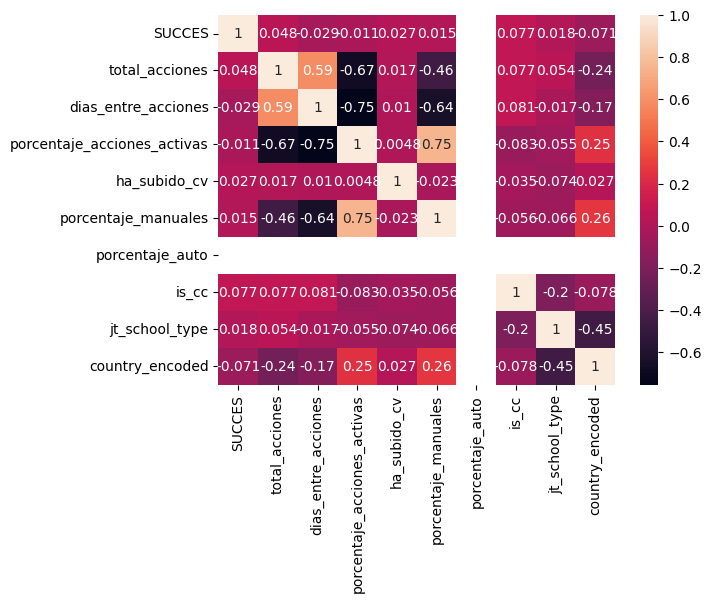

In [ ]:
sns.heatmap(df[['SUCCES',  'total_acciones', 'dias_entre_acciones',
       'porcentaje_acciones_activas', 'ha_subido_cv', 'porcentaje_manuales',
       'porcentaje_auto', 'is_cc',  'jt_school_type',
       'country_encoded']].corr(), annot=True)

In [ ]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# usar onehotencoder con jt_school_type
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(df[['jt_school_type']])
x_train_ohe = ohe.fit_transform(x_train[['jt_school_type']])
x_test_ohe = ohe.transform(x_test[['jt_school_type']])
cat_feature_names = ohe.get_feature_names_out(['jt_school_type'])
cat_features_train_df = pd.DataFrame(x_train_ohe, columns=cat_feature_names)
cat_features_test_df = pd.DataFrame(x_test_ohe, columns=cat_feature_names)
X_train_preprocessed  = pd.concat([x_train, cat_features_train_df], axis=1)
X_test_preprocessed = pd.concat([x_test, cat_features_test_df], axis=1)

In [ ]:
X_train_preprocessed

,SUCCES,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,is_cc,jt_school_type,country_encoded,jt_school_type_1.0,jt_school_type_2.0,jt_school_type_3.0,jt_school_type_6.0,jt_school_type_7.0,jt_school_type_8.0
1002,0.0,1.0,0.0,1.000000,True,1.000000,0.0,True,3.0,26599.0,NaN,NaN,NaN,NaN,NaN,NaN
1062,0.0,2.0,305.0,0.500000,True,1.000000,0.0,True,2.0,46387.0,NaN,NaN,NaN,NaN,NaN,NaN
731,0.0,4.0,207.0,0.500000,True,0.500000,0.0,True,2.0,216441.0,1.0,0.0,0.0,0.0,0.0,0.0
950,0.0,3.0,17.0,0.666667,True,1.000000,0.0,True,3.0,216441.0,NaN,NaN,NaN,NaN,NaN,NaN
292,1.0,6.0,364.0,0.500000,True,0.666667,0.0,True,2.0,26599.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0
874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#eliminar na de succes
X_train_preprocessed = X_train_preprocessed.dropna(subset=['SUCCES'])
X_test_preprocessed = X_test_preprocessed.dropna(subset=['SUCCES'])

In [ ]:
X_train_preprocessed

,SUCCES,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,is_cc,jt_school_type,country_encoded,jt_school_type_1.0,jt_school_type_2.0,jt_school_type_3.0,jt_school_type_6.0,jt_school_type_7.0,jt_school_type_8.0
1002,0.0,1.0,0.0,1.000000,True,1.000000,0.0,True,3.0,26599.0,NaN,NaN,NaN,NaN,NaN,NaN
1062,0.0,2.0,305.0,0.500000,True,1.000000,0.0,True,2.0,46387.0,NaN,NaN,NaN,NaN,NaN,NaN
731,0.0,4.0,207.0,0.500000,True,0.500000,0.0,True,2.0,216441.0,1.0,0.0,0.0,0.0,0.0,0.0
950,0.0,3.0,17.0,0.666667,True,1.000000,0.0,True,3.0,216441.0,NaN,NaN,NaN,NaN,NaN,NaN
292,1.0,6.0,364.0,0.500000,True,0.666667,0.0,True,2.0,26599.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1.0,1.0,0.0,1.000000,True,1.000000,0.0,True,3.0,16686.0,0.0,1.0,0.0,0.0,0.0,0.0
121,1.0,1.0,0.0,1.000000,True,1.000000,0.0,True,2.0,216441.0,1.0,0.0,0.0,0.0,0.0,0.0
1045,0.0,3.0,355.0,0.666667,True,0.666667,0.0,True,1.0,216441.0,NaN,NaN,NaN,NaN,NaN,NaN
1096,0.0,1.0,0.0,1.000000,True,1.000000,0.0,True,3.0,216441.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#cambiar nulos a 0
X_train_preprocessed = X_train_preprocessed.fillna(0)
X_test_preprocessed = X_test_preprocessed.fillna(0)

In [ ]:
# Reemplazar True con 1 y False con 0 en la columna 'is_cc'
X_train_preprocessed['is_cc'] = X_train_preprocessed['is_cc'].replace({True: 1, False: 0})
X_test_preprocessed['is_cc'] = X_test_preprocessed['is_cc'].replace({True: 1, False: 0})



In [ ]:
X_train_preprocessed['SUCCES'].value_counts()

,count
SUCCES,
0.0,480
1.0,406


In [ ]:
X_train_preprocessed

,SUCCES,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,is_cc,jt_school_type,country_encoded,jt_school_type_1.0,jt_school_type_2.0,jt_school_type_3.0,jt_school_type_6.0,jt_school_type_7.0,jt_school_type_8.0
1002,0.0,1.0,0.0,1.000000,True,1.000000,0.0,1,3.0,26599.0,0.0,0.0,0.0,0.0,0.0,0.0
1062,0.0,2.0,305.0,0.500000,True,1.000000,0.0,1,2.0,46387.0,0.0,0.0,0.0,0.0,0.0,0.0
731,0.0,4.0,207.0,0.500000,True,0.500000,0.0,1,2.0,216441.0,1.0,0.0,0.0,0.0,0.0,0.0
950,0.0,3.0,17.0,0.666667,True,1.000000,0.0,1,3.0,216441.0,0.0,0.0,0.0,0.0,0.0,0.0
292,1.0,6.0,364.0,0.500000,True,0.666667,0.0,1,2.0,26599.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1.0,1.0,0.0,1.000000,True,1.000000,0.0,1,3.0,16686.0,0.0,1.0,0.0,0.0,0.0,0.0
121,1.0,1.0,0.0,1.000000,True,1.000000,0.0,1,2.0,216441.0,1.0,0.0,0.0,0.0,0.0,0.0
1045,0.0,3.0,355.0,0.666667,True,0.666667,0.0,1,1.0,216441.0,0.0,0.0,0.0,0.0,0.0,0.0
1096,0.0,1.0,0.0,1.000000,True,1.000000,0.0,1,3.0,216441.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_preprocessed.columns

Index(['SUCCES', 'total_acciones', 'dias_entre_acciones',
       'porcentaje_acciones_activas', 'ha_subido_cv', 'porcentaje_manuales',
       'porcentaje_auto', 'is_cc', 'jt_school_type', 'country_encoded',
       'jt_school_type_1.0', 'jt_school_type_2.0', 'jt_school_type_3.0',
       'jt_school_type_6.0', 'jt_school_type_7.0', 'jt_school_type_8.0'],
      dtype='object')

In [ ]:
X_train_preprocessed = X_train_preprocessed[['SUCCES', 'total_acciones', 'dias_entre_acciones',
       'porcentaje_acciones_activas', 'ha_subido_cv', 'porcentaje_manuales',
       'porcentaje_auto', 'is_cc', 'country_encoded',
       'jt_school_type_1.0', 'jt_school_type_2.0', 'jt_school_type_3.0',
       'jt_school_type_6.0', 'jt_school_type_7.0', 'jt_school_type_8.0']]

In [ ]:
X_train_preprocessed

,SUCCES,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,is_cc,country_encoded,jt_school_type_1.0,jt_school_type_2.0,jt_school_type_3.0,jt_school_type_6.0,jt_school_type_7.0,jt_school_type_8.0
1002,0.0,1.0,0.0,1.000000,True,1.000000,0.0,1,26599.0,0.0,0.0,0.0,0.0,0.0,0.0
1062,0.0,2.0,305.0,0.500000,True,1.000000,0.0,1,46387.0,0.0,0.0,0.0,0.0,0.0,0.0
731,0.0,4.0,207.0,0.500000,True,0.500000,0.0,1,216441.0,1.0,0.0,0.0,0.0,0.0,0.0
950,0.0,3.0,17.0,0.666667,True,1.000000,0.0,1,216441.0,0.0,0.0,0.0,0.0,0.0,0.0
292,1.0,6.0,364.0,0.500000,True,0.666667,0.0,1,26599.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1.0,1.0,0.0,1.000000,True,1.000000,0.0,1,16686.0,0.0,1.0,0.0,0.0,0.0,0.0
121,1.0,1.0,0.0,1.000000,True,1.000000,0.0,1,216441.0,1.0,0.0,0.0,0.0,0.0,0.0
1045,0.0,3.0,355.0,0.666667,True,0.666667,0.0,1,216441.0,0.0,0.0,0.0,0.0,0.0,0.0
1096,0.0,1.0,0.0,1.000000,True,1.000000,0.0,1,216441.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Revisa los valores únicos de cada columna
for column in X_train_preprocessed.columns:
    print(f"{column}: {X_train_preprocessed[column].nunique()} unique values")


SUCCES: 2 unique values
total_acciones: 11 unique values
dias_entre_acciones: 242 unique values
porcentaje_acciones_activas: 12 unique values
ha_subido_cv: 2 unique values
porcentaje_manuales: 16 unique values
porcentaje_auto: 1 unique values
is_cc: 2 unique values
country_encoded: 16 unique values
jt_school_type_1.0: 2 unique values
jt_school_type_2.0: 2 unique values
jt_school_type_3.0: 2 unique values
jt_school_type_6.0: 2 unique values
jt_school_type_7.0: 2 unique values
jt_school_type_8.0: 1 unique values


In [ ]:
#cambiar todas las columnas de X_train_preprocessed y test a int
X_train_preprocessed = X_train_preprocessed.astype(int)
X_test_preprocessed = X_test_preprocessed.astype(int)

In [ ]:
X_train_preprocessed

,SUCCES,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,is_cc,country_encoded,jt_school_type_1.0,jt_school_type_2.0,jt_school_type_3.0,jt_school_type_6.0,jt_school_type_7.0,jt_school_type_8.0
1002,0,1,0,1,1,1,0,1,26599,0,0,0,0,0,0
1062,0,2,305,0,1,1,0,1,46387,0,0,0,0,0,0
731,0,4,207,0,1,0,0,1,216441,1,0,0,0,0,0
950,0,3,17,0,1,1,0,1,216441,0,0,0,0,0,0
292,1,6,364,0,1,0,0,1,26599,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,1,0,1,1,1,0,1,16686,0,1,0,0,0,0
121,1,1,0,1,1,1,0,1,216441,1,0,0,0,0,0
1045,0,3,355,0,1,0,0,1,216441,0,0,0,0,0,0
1096,0,1,0,1,1,1,0,1,216441,0,0,0,0,0,0


In [ ]:
#pip install pycaret

In [ ]:
X_train_preprocessed.columns

Index(['SUCCES', 'total_acciones', 'dias_entre_acciones',
       'porcentaje_acciones_activas', 'ha_subido_cv', 'porcentaje_manuales',
       'porcentaje_auto', 'is_cc', 'country_encoded', 'jt_school_type_1.0',
       'jt_school_type_2.0', 'jt_school_type_3.0', 'jt_school_type_6.0',
       'jt_school_type_7.0', 'jt_school_type_8.0'],
      dtype='object')

In [ ]:
'''
from pycaret.classification import setup
xp = setup(data=X_train_preprocessed, test_data = X_test_preprocessed,
           target='SUCCES',
           normalize = True,
           session_id=42,
           numeric_features=['interesado_count', 'no_interesado_count', 'num_auto_timeouts', 'num_oportunidades_shortlist'],
           categorical_features=['is_cc', 'country_encoded', 'jt_school_type_1', 'jt_school_type_2', 'jt_school_type_3',
       'jt_school_type_6', 'jt_school_type_7', 'jt_school_type_8'],
           )
'''

"\nfrom pycaret.classification import setup\nxp = setup(data=X_train_preprocessed, test_data = X_test_preprocessed,\n           target='SUCCES',\n           normalize = True,\n           session_id=42,\n           numeric_features=['interesado_count', 'no_interesado_count', 'num_auto_timeouts', 'num_oportunidades_shortlist'],\n           categorical_features=['is_cc', 'country_encoded', 'jt_school_type_1', 'jt_school_type_2', 'jt_school_type_3',\n       'jt_school_type_6', 'jt_school_type_7', 'jt_school_type_8'],\n           )\n"

In [ ]:

from pycaret.classification import setup

xp = setup(data = X_train_preprocessed,
           test_data = X_test_preprocessed,
           target = 'SUCCES',
           normalize = True,
           session_id = 42
           )


,Description,Value
0,Session id,42
1,Target,SUCCES
2,Target type,Binary
3,Original data shape,"(1108, 16)"
4,Transformed data shape,"(1108, 15)"
5,Transformed train set shape,"(886, 15)"
6,Transformed test set shape,"(222, 15)"
7,Numeric features,15
8,Rows with missing values,80.0%
9,Preprocess,True


In [ ]:
from pycaret.classification import compare_models

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6931,0.7458,0.8032,0.6299,0.7053,0.3947,0.4089,1.0140
rf,Random Forest Classifier,0.6818,0.7349,0.7909,0.6210,0.6945,0.3726,0.3864,0.2250
et,Extra Trees Classifier,0.6739,0.7321,0.7860,0.6135,0.6882,0.3574,0.3709,0.3500
lr,Logistic Regression,0.6728,0.7503,0.8179,0.6064,0.6950,0.3581,0.3810,0.7330
gbc,Gradient Boosting Classifier,0.6694,0.7428,0.8080,0.6040,0.6900,0.3508,0.3712,0.5050
knn,K Neighbors Classifier,0.6693,0.7398,0.6277,0.6440,0.6325,0.3323,0.3357,0.0560
xgboost,Extreme Gradient Boosting,0.6693,0.7287,0.7685,0.6126,0.6804,0.3472,0.3586,0.0930
ada,Ada Boost Classifier,0.6670,0.7309,0.7216,0.6163,0.6637,0.3378,0.3439,0.1670
ridge,Ridge Classifier,0.6660,0.7489,0.8401,0.5966,0.6966,0.3477,0.3770,0.0390
lda,Linear Discriminant Analysis,0.6660,0.7490,0.8425,0.5962,0.6971,0.3479,0.3782,0.0590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
from pycaret.classification import tune_model

best_model_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6742,0.7538,0.8537,0.6034,0.7071,0.3635,0.3918
1,0.6629,0.7172,0.8049,0.6000,0.6875,0.3381,0.3555
2,0.6067,0.6491,0.6341,0.5652,0.5977,0.2156,0.2169
3,0.6854,0.6778,0.8537,0.6140,0.7143,0.3844,0.4106
4,0.6966,0.8018,0.8049,0.6346,0.7097,0.4012,0.4137
5,0.6742,0.7632,0.7317,0.6250,0.6742,0.3523,0.3567
6,0.6932,0.7138,0.8000,0.6275,0.7033,0.3951,0.4077
7,0.7386,0.7635,0.8000,0.6809,0.7356,0.4805,0.4866
8,0.5682,0.6044,0.6750,0.5192,0.5870,0.1504,0.1561


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
from pycaret.classification import plot_model, evaluate_model

evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

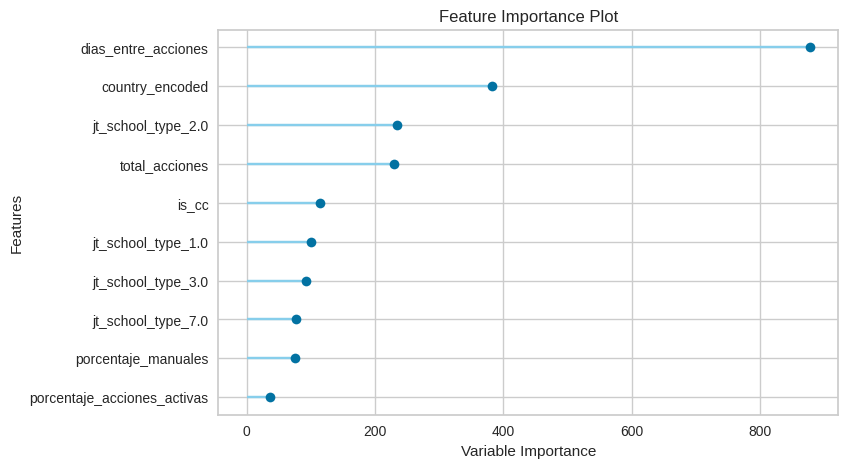

In [ ]:
plot_model(best_model, plot = 'feature')

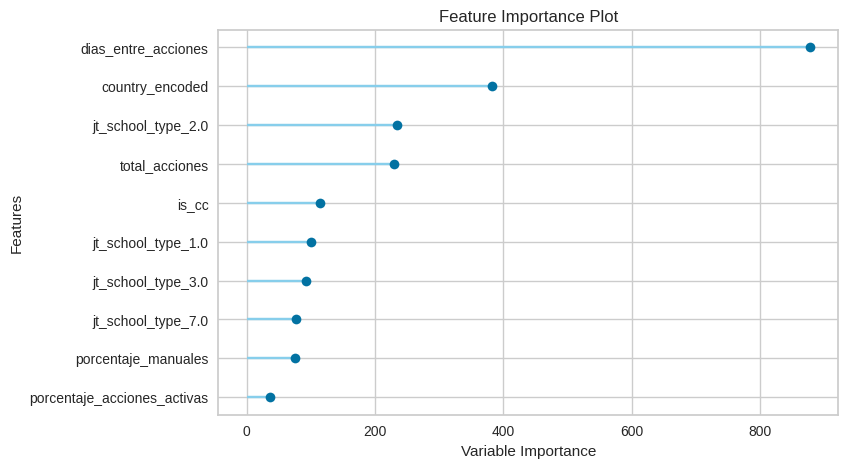

In [ ]:
plot_model(best_model_tuned, plot = 'feature')

In [ ]:
from pycaret.classification import save_model

# Guardar el modelo tunado
save_model(best_model_tuned, 'best_model_tuned')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['total_acciones',
                                              'dias_entre_acciones',
                                              'porcentaje_acciones_activas',
                                              'ha_subido_cv',
                                              'porcentaje_manuales',
                                              'porcentaje_auto', 'is_cc',
                                              'country_encoded',
                                              'jt_school_type_1.0',
                                              'jt_school_type_2.0',
                                              'jt_school_type_3.0',
                                              'jt_school_type_6.0',
                                              'jt_schoo...
                  LGBMClassifier(boosting_type='gbdt', clas

In [ ]:
from pycaret.classification import setup, compare_models, tune_model, save_model, load_model

# Cargar el modelo guardado
loaded_model = load_model('best_model_tuned')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
from pycaret.classification import predict_model

# Hacer predicciones en el conjunto de prueba
predicciones = predict_model(best_model_tuned, data=X_test_preprocessed)

# Mostrar el dataframe con las predicciones
predicciones


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6847,0.7645,0.3333,1.0000,0.5000,0.3451,0.4567


,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,is_cc,jt_school_type,country_encoded,jt_school_type_1.0,jt_school_type_2.0,jt_school_type_3.0,jt_school_type_6.0,jt_school_type_7.0,jt_school_type_8.0,SUCCES,prediction_label,prediction_score
616,2,383,0,1,0,0,1,2,26599,0,0,0,0,0,0,0,0,0.9767
735,2,367,0,1,0,0,1,2,216441,0,0,0,0,0,0,0,0,0.9598
56,1,0,1,1,1,0,1,2,26599,0,0,1,0,0,0,1,1,0.6121
667,1,0,1,1,1,0,1,2,216441,0,0,0,0,0,0,0,0,0.9860
650,1,0,1,1,1,0,0,7,216441,0,0,0,0,0,0,0,0,0.9751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1,0,1,0,1,0,1,2,216441,0,0,0,0,0,0,0,0,0.9860
894,1,0,1,1,1,0,1,1,216441,0,0,0,0,0,0,0,0,0.9860
378,1,0,1,1,1,0,1,7,216441,0,0,0,0,0,0,1,0,0.9860
323,1,0,1,1,1,0,1,2,216441,0,0,0,0,0,0,1,0,0.9860


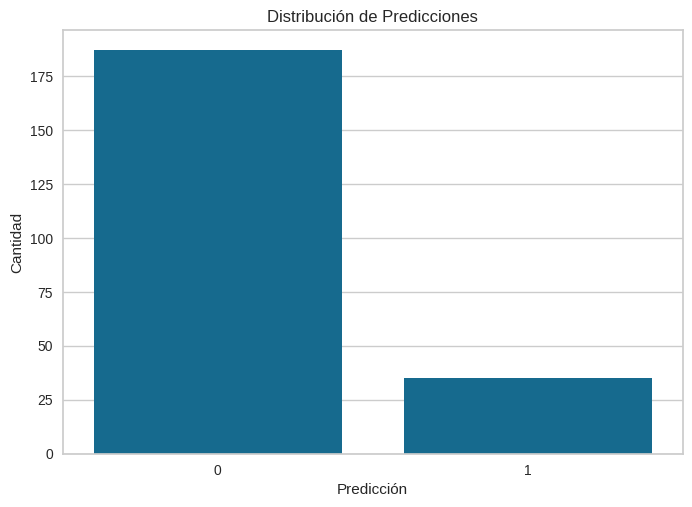

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usar la columna correcta para las predicciones
sns.countplot(x='prediction_label', data=predicciones)
plt.title('Distribución de Predicciones')
plt.xlabel('Predicción')
plt.ylabel('Cantidad')
plt.show()



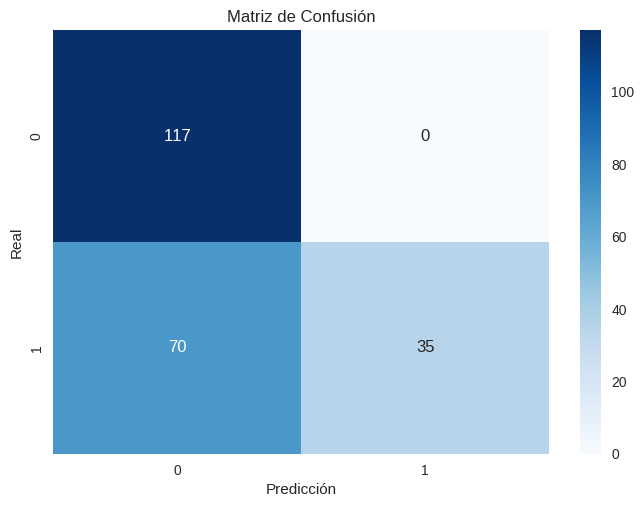

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(predicciones['SUCCES'], predicciones['prediction_label'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
predicciones[predicciones['SUCCES']==1].sort_values(by='dias_entre_acciones', ascending=False)

,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,is_cc,jt_school_type,country_encoded,jt_school_type_1.0,jt_school_type_2.0,jt_school_type_3.0,jt_school_type_6.0,jt_school_type_7.0,jt_school_type_8.0,SUCCES,prediction_label,prediction_score
381,4,382,0,1,1,0,1,2,216441,0,0,0,0,0,0,1,0,0.9471
318,7,376,0,1,0,0,1,2,26599,0,0,0,0,0,0,1,0,0.9756
405,2,372,0,1,1,0,1,2,16686,0,0,0,0,0,0,1,0,0.9302
449,4,336,0,1,0,0,1,1,216441,0,0,0,0,0,0,1,0,0.9879
107,2,334,0,1,0,0,1,2,216441,0,0,1,0,0,0,1,0,0.6542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1,0,1,1,1,0,1,3,216441,0,0,0,0,1,0,1,1,0.7094
138,1,0,1,1,1,0,1,2,216441,0,0,0,0,1,0,1,1,0.7094
10,1,0,1,1,1,0,1,2,216441,1,0,0,0,0,0,1,1,0.6162
96,1,0,1,1,1,0,1,7,216441,0,1,0,0,0,0,1,1,0.5593


<Axes: xlabel='dias_entre_acciones', ylabel='prediction_score'>

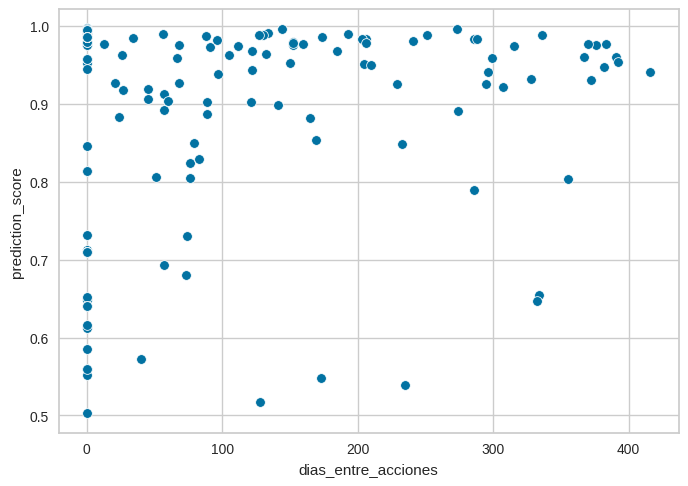

In [ ]:
#graficar  dias_entre_acciones y prediction_score
sns.scatterplot(x='dias_entre_acciones', y='prediction_score', data=predicciones)

In [ ]:
predicciones[predicciones['prediction_label']==0]

,total_acciones,dias_entre_acciones,porcentaje_acciones_activas,ha_subido_cv,porcentaje_manuales,porcentaje_auto,is_cc,jt_school_type,country_encoded,jt_school_type_1.0,jt_school_type_2.0,jt_school_type_3.0,jt_school_type_6.0,jt_school_type_7.0,jt_school_type_8.0,SUCCES,prediction_label,prediction_score
616,2,383,0,1,0,0,1,2,26599,0,0,0,0,0,0,0,0,0.9767
735,2,367,0,1,0,0,1,2,216441,0,0,0,0,0,0,0,0,0.9598
667,1,0,1,1,1,0,1,2,216441,0,0,0,0,0,0,0,0,0.9860
650,1,0,1,1,1,0,0,7,216441,0,0,0,0,0,0,0,0,0.9751
614,1,0,1,1,1,0,1,2,26599,0,0,0,0,0,0,0,0,0.9946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1,0,1,0,1,0,1,2,216441,0,0,0,0,0,0,0,0,0.9860
894,1,0,1,1,1,0,1,1,216441,0,0,0,0,0,0,0,0,0.9860
378,1,0,1,1,1,0,1,7,216441,0,0,0,0,0,0,1,0,0.9860
323,1,0,1,1,1,0,1,2,216441,0,0,0,0,0,0,1,0,0.9860
